#                                       Prediction of Rain - Logistic Regression

### Prediction of rain using real world dataset from kaggle. This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.


# Problem Statement
    To know about the missing values, Outliers in the dataset
    To Treat Missing values and outliers using various statistical methods
    To perform EDA and Visualizationm to gather insights
    To do Feature Selection and Normalization
    To build various Classification models and select best model to Hyperparameter tune



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')

In [9]:
df = pd.read_csv("weatherAUS.csv")

In [10]:
df_backup = df.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

percent_missing
Date                  0.000000
Location              0.000000
MinTemp               1.020899
MaxTemp               0.866905
Rainfall              2.241853
Evaporation          43.166506
Sunshine             48.009762
WindGustDir           7.098859
WindGustSpeed         7.055548
WindDir9am            7.263853
WindDir3pm            2.906641
WindSpeed9am          1.214767
WindSpeed3pm          2.105046
Humidity9am           1.824557
Humidity3pm           3.098446
Pressure9am          10.356799
Pressure3pm          10.331363
Cloud9am             38.421559
Cloud3pm             40.807095
Temp9am               1.214767
Temp3pm               2.481094
RainToday             2.241853
RainTomorrow          2.245978

## There are missing Values in the dataset, Dropping Columns where missing values are more than 25%

## There are Missing values in target column and highly impactful rain today column so dropping those missing records

In [14]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [15]:
df.drop(labels=["Evaporation","Sunshine","Cloud3pm","Cloud9am"],axis=1,inplace=True)

In [16]:
df.shape

(140787, 19)

In [17]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()[:-2]
categorical_cols = df.select_dtypes('object').columns.tolist()

print(numeric_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
df[numeric_cols].describe()

MinTemp       MaxTemp       Rainfall  WindGustSpeed  \
count  140319.000000  140480.00000  140787.000000  131682.000000   
mean       12.184824      23.23512       2.349974      39.970520   
std         6.403879       7.11450       8.465173      13.578201   
min        -8.500000      -4.80000       0.000000       6.000000   
25%         7.600000      17.90000       0.000000      31.000000   
50%        12.000000      22.60000       0.000000      39.000000   
75%        16.800000      28.30000       0.800000      48.000000   
max        33.900000      48.10000     371.000000     135.000000   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  139732.000000  138256.000000  139270.000000  137286.000000   
mean       13.990496      18.631141      68.826833      51.449288   
std         8.886210       8.798096      19.063650      20.807310   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.000000      13.000000      57.000000      37.000000   
50%        13.000000      19.000000      70.000000      52.000000   
75%        19.000000      24.000000      83.000000      66.000000   
max       130.000000      87.000000     100.000000     100.000000   

         Pressure9am    Pressure3pm  
count  127044.000000  127018.000000  
mean     1017.654577    1015.257963  
std         7.104867       7.035411  
min       980.500000     977.100000  
25%      1013.000000    1010.400000  
50%      1017.600000    1015.200000  
75%      1022.400000    1020.000000  
max      1041.000000    1039.600000

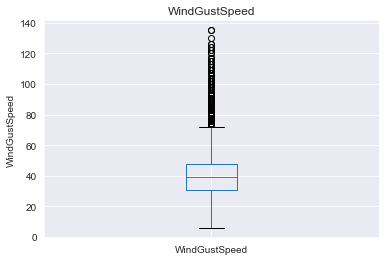

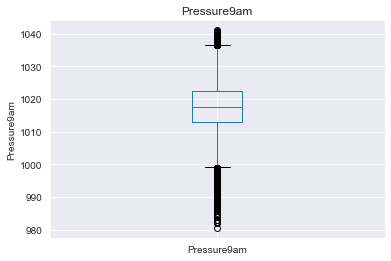

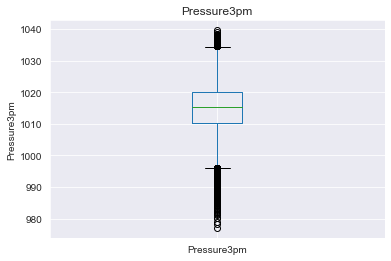

In [19]:
for feature in df[numeric_cols]:
    data=df[numeric_cols].copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

There are outliers in numeric columns so treating them with median

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(strategy = 'median')

In [22]:
imputer.fit(df[numeric_cols])

SimpleImputer(strategy='median')

In [23]:
df[numeric_cols] = imputer.transform(df[numeric_cols])

In [24]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am           656
Temp3pm          2624
RainToday           0
RainTomorrow        0
dtype: int64

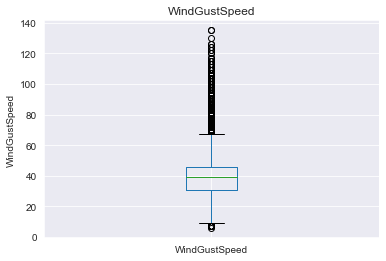

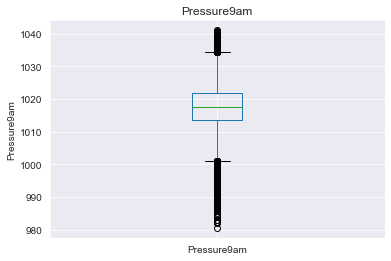

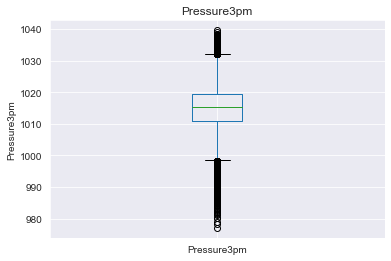

In [25]:
for feature in df[numeric_cols]:
    data=df[numeric_cols].copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

# Univarient analysis

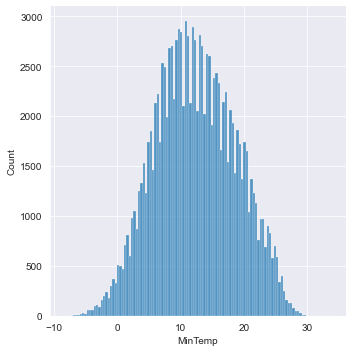

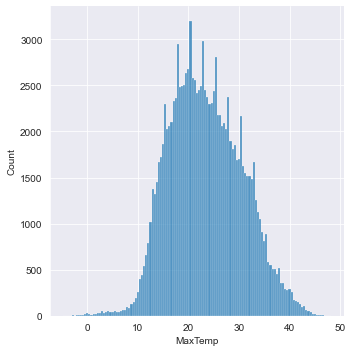

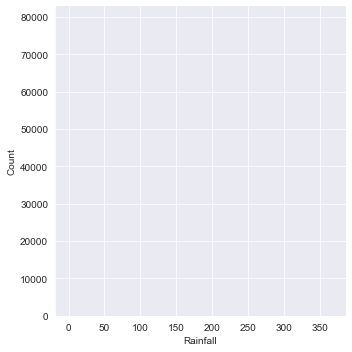

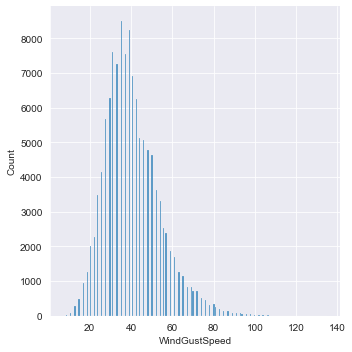

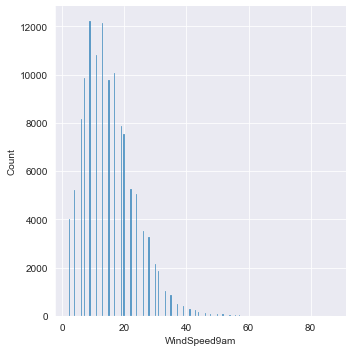

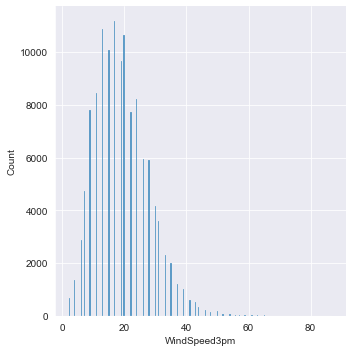

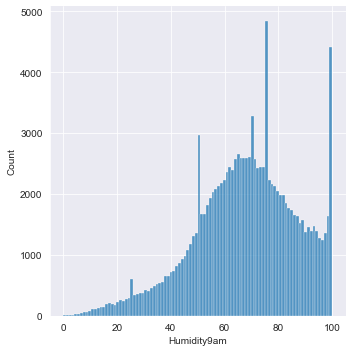

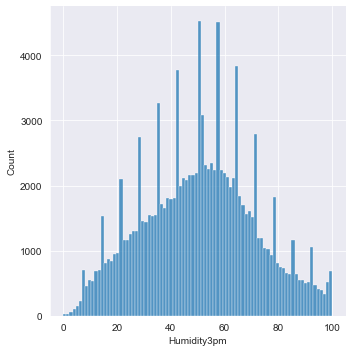

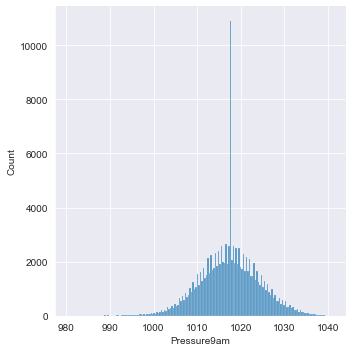

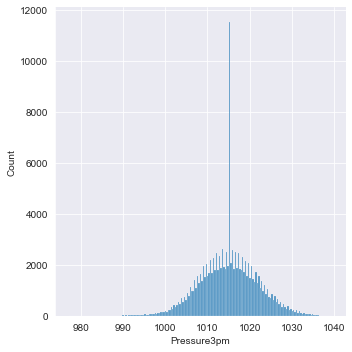

In [145]:
for feature in df[numeric_cols]:
    sns.displot(x=df[feature])
    plt.show()

We will use minmaxscaler because most of the features are not in normal distribution

In [27]:
df[numeric_cols].corr()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.734409  0.103747       0.173484      0.175070   
MaxTemp        0.734409  1.000000 -0.074614       0.067769      0.014516   
Rainfall       0.103747 -0.074614  1.000000       0.127689      0.086334   
WindGustSpeed  0.173484  0.067769  0.127689       1.000000      0.579563   
WindSpeed9am   0.175070  0.014516  0.086334       0.579563      1.000000   
WindSpeed3pm   0.174408  0.050721  0.057108       0.659731      0.513319   
Humidity9am   -0.233159 -0.501752  0.222236      -0.210010     -0.268837   
Humidity3pm    0.005767 -0.500560  0.250725      -0.027150     -0.031192   
Pressure9am   -0.424662 -0.308974 -0.160405      -0.426864     -0.214570   
Pressure3pm   -0.434575 -0.397604 -0.120955      -0.385049     -0.164424   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.174408    -0.233159     0.005767    -0.424662   
MaxTemp            0.050721    -0.501752    -0.500560    -0.308974   
Rainfall           0.057108     0.222236     0.250725    -0.160405   
WindGustSpeed      0.659731    -0.210010    -0.027150    -0.426864   
WindSpeed9am       0.513319    -0.268837    -0.031192    -0.214570   
WindSpeed3pm       1.000000    -0.144376     0.015841    -0.276895   
Humidity9am       -0.144376     1.000000     0.661119     0.130991   
Humidity3pm        0.015841     0.661119     1.000000    -0.026569   
Pressure9am       -0.276895     0.130991    -0.026569     1.000000   
Pressure3pm       -0.239318     0.175770     0.047857     0.960051   

               Pressure3pm  
MinTemp          -0.434575  
MaxTemp          -0.397604  
Rainfall         -0.120955  
WindGustSpeed    -0.385049  
WindSpeed9am     -0.164424  
WindSpeed3pm     -0.239318  
Humidity9am       0.175770  
Humidity3pm       0.047857  
Pressure9am       0.960051  
Pressure3pm       1.000000

Pressure9am and pressure3pm are strongly positively corelated so further pressure9am can be dropped

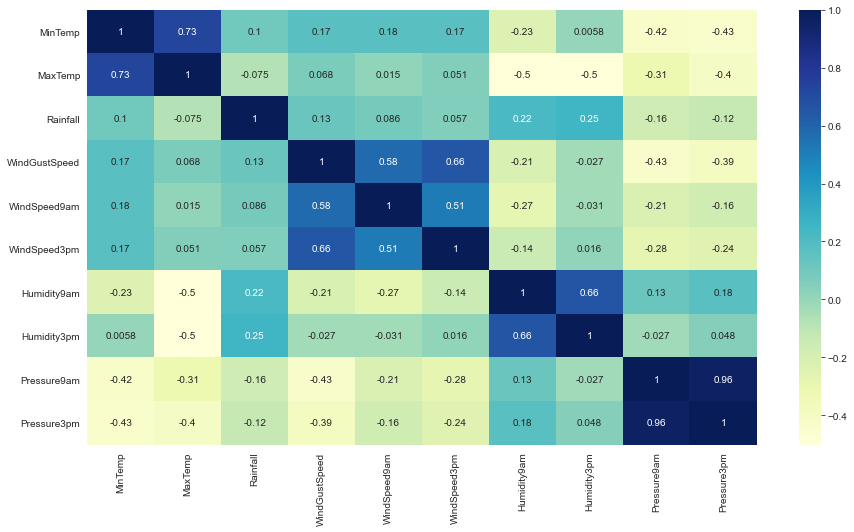

In [28]:
plt.figure(figsize=(15,8))
cor = df[numeric_cols].corr()
dataplot = sns.heatmap(cor, cmap="YlGnBu",annot=True)
plt.show()

Correlation of categorical features

In [29]:
cat_cor = df[categorical_cols].corr(method="kendall")

# BIVARIATE ANALYSIS

In [30]:
px.histogram(df, x='Location', title='Location vs. Rainy Days', color='RainToday')

Portland has the most rainy days, mostly the data is normally distributed

Impact of temparature on rain tommorow??

In [31]:
px.histogram(df, x='Temp3pm',title='Temperature at 3 pm vs. Rain Tomorrow',color='RainTomorrow',width=800, height=400)

When the temperature is low at 3 pm the chances of rain is more tommorow

What is the significance of rain today with rain tommorow??

In [32]:
px.histogram(df, x='RainTomorrow', color='RainToday',title='Rain Tomorrow vs. Rain Today',width=800, height=400)

The signifiacnce is low

In [33]:

px.scatter(df.sample(2000),title='Min Temp. vs Max Temp.',x='MinTemp', y='MaxTemp', color='RainToday',width=800, height=400)

# VIF - Variance Inflation Factor

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=df[numeric_cols].columns
vif["VIF"]=[variance_inflation_factor(df[numeric_cols].values,i) for i in range(len(df[numeric_cols].columns))]
vif

Features            VIF
0        MinTemp      20.569471
1        MaxTemp      68.298801
2       Rainfall       1.220727
3  WindGustSpeed      21.414876
4   WindSpeed9am       6.238214
5   WindSpeed3pm      10.451182
6    Humidity9am      31.736728
7    Humidity3pm      22.869472
8    Pressure9am  360480.629610
9    Pressure3pm  358877.681473

### There is Muliticolinearity among features

Pressure9am and pressure3am are having high VIF scores so one of them can be dropped for better accuracy 

In [35]:
df.dropna(axis=0,inplace=True)

In [36]:
x = df.iloc[:,1:18]
y = df.iloc[:,-1]


In [37]:
Prevalance_rate=y.value_counts(normalize=True).mul(100).round(1)
Prevalance_rate

No     77.9
Yes    22.1
Name: RainTomorrow, dtype: float64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

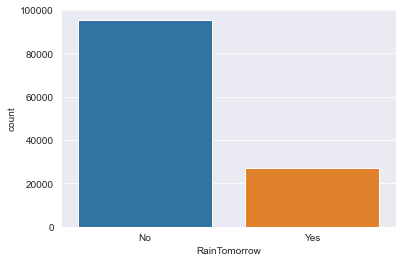

In [38]:
sns.countplot(x=y)

### The Dataset is not balanced

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(92004, 17)
(30668, 17)
(92004,)
(30668,)


In [42]:
input_cols = list(X_train.columns)[1:-1]
target_col = 'RainTomorrow'

In [43]:
Prevalance_rate=y_train.value_counts(normalize=True).mul(100).round(1)
Prevalance_rate

No     77.9
Yes    22.1
Name: RainTomorrow, dtype: float64

In [44]:
Prevalance_rate=y_test.value_counts(normalize=True).mul(100).round(1)
Prevalance_rate

No     78.0
Yes    22.0
Name: RainTomorrow, dtype: float64

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [48]:
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [49]:
X_train[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall  WindGustSpeed  WindSpeed9am  \
count  92004.000000  92004.000000  92004.000000   92004.000000  92004.000000   
mean       0.492423      0.533736      0.006415       0.263153      0.153090   
std        0.149405      0.135108      0.023155       0.104455      0.097822   
min        0.000000      0.030246      0.000000       0.015625      0.000000   
25%        0.384434      0.432892      0.000000       0.187500      0.082353   
50%        0.487028      0.523629      0.000000       0.250000      0.129412   
75%        0.601415      0.629490      0.001632       0.320312      0.211765   
max        1.000000      1.000000      1.000000       0.960938      1.000000   

       WindSpeed3pm   Humidity9am   Humidity3pm   Pressure9am   Pressure3pm  
count  92004.000000  92004.000000  92004.000000  92004.000000  92004.000000  
mean       0.202255      0.676655      0.508066      0.610489      0.607334  
std        0.100732      0.190446      0.209046      0.112127      0.107396  
min        0.000000      0.010000      0.000000      0.000000      0.017600  
25%        0.129412      0.560000      0.360000      0.540496      0.537600  
50%        0.200000      0.690000      0.510000      0.613223      0.609600  
75%        0.258824      0.820000      0.650000      0.680992      0.675200  
max        1.000000      1.000000      1.000000      1.000000      1.000000

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()
X_train.RainToday = le.fit_transform(X_train.RainToday)
X_test.RainToday = le.fit_transform(X_test.RainToday)
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


In [52]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [53]:
df.dropna(axis=0,inplace=True)

# Using Undersampling Technique to balance the Target Variable

In [54]:
from imblearn.under_sampling import NearMiss

In [55]:
nm = NearMiss()

In [56]:
x_train, y_train = nm.fit_resample(X_train,y_train)
x_test, ytest = nm.fit_resample(X_test,y_test)

<AxesSubplot:ylabel='count'>

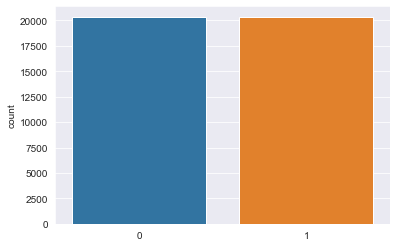

In [57]:
sns.countplot(x=y_train)

<AxesSubplot:ylabel='count'>

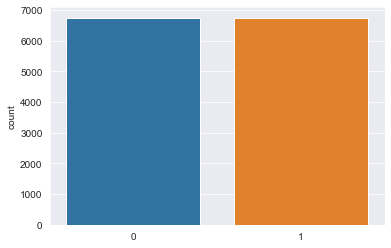

In [58]:
sns.countplot(x=ytest)

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(ytest.shape)

(40714, 108)
(13492, 108)
(40714,)
(13492,)


# Building Classification Models

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logModel = LogisticRegression(solver='liblinear',penalty="l2",max_iter=5000) 

In [62]:
logModel.fit(x_train,y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

In [63]:
train_pred=logModel.predict(x_train)

In [64]:
test_pred=logModel.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [65]:
prod_trainpred=logModel.predict_proba(x_train)
prod_trainpred

array([[0.82444984, 0.17555016],
       [0.7070671 , 0.2929329 ],
       [0.89176951, 0.10823049],
       ...,
       [0.19784314, 0.80215686],
       [0.08286522, 0.91713478],
       [0.55495229, 0.44504771]])

In [66]:
prod_trainpred=logModel.predict_proba(x_test)
prod_trainpred

array([[0.7945951 , 0.2054049 ],
       [0.76725632, 0.23274368],
       [0.68103765, 0.31896235],
       ...,
       [0.86990898, 0.13009102],
       [0.55662139, 0.44337861],
       [0.03652464, 0.96347536]])

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
acc_train_l = accuracy_score(y_train,train_pred)
acc_train_l

0.757601807731984

In [69]:
acc_test_l =accuracy_score(ytest,test_pred)
acc_test_l

0.7582270975392825

# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
d_tree = DecisionTreeClassifier()

In [72]:
d_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
train_d_pred=d_tree.predict(x_train)
train_d_pred

array([0, 0, 0, ..., 1, 1, 1])

In [74]:
test_pred_dtc = d_tree.predict(x_test)

In [75]:
acc_train_dtc =accuracy_score(y_train,train_d_pred)
acc_train_dtc

1.0

In [76]:
acc_test_dtc = accuracy_score(ytest,test_pred_dtc)
acc_test_dtc # model is overfitting

0.6887044174325526

# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier()

In [79]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
train_pred_rf = rf.predict(x_train)

In [81]:
test_pred_rf = rf.predict(x_test)

In [82]:
acc_train_rf = accuracy_score(y_train,train_pred_rf)
acc_train_rf

1.0

In [83]:
acc_test_rf =accuracy_score(ytest,test_pred_rf) # model is overfitting

## KNN Model

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [85]:
knn.fit(x_train,y_train)
acc_train_knn= knn.score(x_train,y_train)
acc_train_knn

0.7917669597681387

In [86]:
acc_test_knn = knn.score(x_test,ytest)
acc_test_knn

0.6703972724577527

## XGBOOST

In [87]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()

In [88]:
xgb.fit(x_train,y_train)
acc_train_xgb = xgb.score(x_train,y_train)
acc_train_xgb

C:\Users\vivek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7473841921697696

In [89]:
acc_test_xgb = xgb.score(x_test,ytest)
acc_test_xgb

0.7368069967388082

## ADA Boost

In [90]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [91]:
ada.fit(x_train,y_train)
acc_train_ada = ada.score(x_train,y_train)
acc_train_ada

0.7477526158078303

In [92]:
acc_test_ada = ada.score(x_test,ytest)
acc_test_ada

0.7453305662614883

In [149]:
models = pd.DataFrame(["Logistic Regression","Decision Tree","Random Forest","KNN Model","XGBoost","ADABoost"])
models["Training Accuracy"] = [acc_train_l,acc_train_dtc,acc_train_rf,acc_train_knn,acc_train_xgb,acc_train_ada]
models["Test Accuracy"] = [acc_test_l,acc_test_dtc,acc_test_rf,acc_test_knn,acc_test_xgb,acc_test_ada]
models["Diff_in_Acc"] = models["Training Accuracy"]-models["Test Accuracy"]
models.rename(columns = {0:'Models'}, inplace = True)
models

Models  Training Accuracy  Test Accuracy  Diff_in_Acc
0  Logistic Regression           0.757602       0.758227    -0.000625
1        Decision Tree           1.000000       0.688704     0.311296
2        Random Forest           1.000000       0.785280     0.214720
3            KNN Model           0.791767       0.670397     0.121370
4              XGBoost           0.747384       0.736807     0.010577
5             ADABoost           0.747753       0.745331     0.002422

# Feature selection

In [94]:
IG = pd.DataFrame(rf.feature_importances_,index=x_train.columns)
IG.sort_values(by=0,ascending=False)
IG.to_csv("IG.csv") # Taking IG values to see the feature importance of each column

Dropping Pressure9am as it is highly corelated with Pressure3pm


In [95]:
x_train1 = x_train.copy()
x_test1 = x_test.copy()

In [96]:
x_train1.drop(labels=["Pressure9am"],axis=1,inplace=True)
x_test1.drop(labels=["Pressure9am"],axis=1,inplace=True)

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
lo= LogisticRegression()

In [99]:
param_grid_l = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear','saga'],
    'max_iter' : [2500, 5000]
    }
]

In [100]:
lr_Randomgrid = RandomizedSearchCV(estimator=lo,param_distributions=param_grid_l,cv=5,verbose=2,scoring="accuracy")

In [101]:
lr_Randomgrid.fit(x_train1,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=3792.690190732246, max_iter=2500, penalty=l2, solver=saga; total time= 1.2min
[CV] END C=3792.690190732246, max_iter=2500, penalty=l2, solver=saga; total time= 1.2min
[CV] END C=3792.690190732246, max_iter=2500, penalty=l2, solver=saga; total time= 1.3min
[CV] END C=3792.690190732246, max_iter=2500, penalty=l2, solver=saga; total time= 1.4min
[CV] END C=3792.690190732246, max_iter=2500, penalty=l2, solver=saga; total time= 1.4min
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   6.7s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   9.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   8.1s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   8.8s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   9.3s
[CV] END C=0.0001, max_i

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [2500, 5000],
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['liblinear', 'saga']}],
                   scoring='accuracy', verbose=2)

In [134]:
lr_Randomgrid.best_params_

{'solver': 'liblinear',
 'penalty': 'l1',
 'max_iter': 5000,
 'C': 3792.690190732246}

In [139]:
acc_train_l2 =lr_Randomgrid.score(x_train1,y_train)
acc_train_l2

0.7567667141523801

In [140]:
acc_test_l2 =lr_Randomgrid.score(x_test1,ytest)
acc_test_l2

0.7582270975392825

## Decision Tree with Hyperparameter Tuning

In [102]:
d_tree1=DecisionTreeClassifier(random_state=0,ccp_alpha=0.00019063,criterion="entropy",max_depth=10,min_samples_leaf=20)

In [103]:
path = d_tree1.cost_complexity_pruning_path(x_train1,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [104]:
alphas = pd.DataFrame(ccp_alphas).sort_values(by=0) # Exported CCP_Alphas values to excel


## Tuning model using calculated CCP_Alphas values to get to optimal accuracy

In [105]:
d_tree1.fit(x_train1,y_train)

DecisionTreeClassifier(ccp_alpha=0.00019063, criterion='entropy', max_depth=10,
                       min_samples_leaf=20, random_state=0)

In [106]:
train_pred_dtc1 = d_tree1.predict(x_train1)

In [107]:
test_pred_dtc1 = d_tree1.predict(x_test1)

In [108]:
acc_train_dtc1 = accuracy_score(y_train,train_pred_dtc1)
acc_train_dtc1

0.7551947732966547

In [109]:
acc_test_dtc1=accuracy_score(ytest,test_pred_dtc1)
acc_test_dtc1


0.7287281351912245

After tuning with CCP_alphas the model has overcome overfittinh

In [110]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [111]:
dtc_Randomgrid = RandomizedSearchCV(estimator=d_tree1,param_distributions=params,cv=5,verbose=2,scoring="accuracy")

In [112]:
dtc_Randomgrid.fit(x_train1,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_sam

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.00019063,
                                                    criterion='entropy',
                                                    max_depth=10,
                                                    min_samples_leaf=20,
                                                    random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]},
                   scoring='accuracy', verbose=2)

In [113]:
dtc_Randomgrid.best_params_

{'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'}

In [114]:
acc_train_dtc2 = dtc_Randomgrid.score(x_train1,y_train)
acc_test_dtc2 = dtc_Randomgrid.score(x_test1,ytest)
print(acc_train_dtc2.round(3)) # overfitting problem is reduced
print(acc_test_dtc2.round(3))

0.755
0.729


# Random forest with hyper parameter tuning

In [185]:
param_grid = {'n_estimators':  [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,11],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True,False]}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 11], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [186]:

rf_Randomgrid = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=5,verbose=2)


In [187]:
rf_Randomgrid.fit(x_train1,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   6.6s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   5.6s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   4.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   4.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   5.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 11],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [188]:
rf_Randomgrid.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': False}

In [189]:
acc_train_rf1 = rf_Randomgrid.score(x_train1,y_train)
acc_test_rf1 = rf_Randomgrid.score(x_test1,ytest)
print(acc_train_rf1.round(3))
print(acc_test_rf1.round(3))

0.793
0.758


# KNN with Hyperparameter Tuning

In [203]:
mean_acc = np.zeros(8)
for i in range(3,9):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train1,y_train)
    yhat= knn.predict(x_test1)
    mean_acc[i-1] = accuracy_score(ytest, yhat)


In [200]:
mean_acc

array([0.        , 0.        , 0.66824785, 0.66305959, 0.68759265,
       0.67447376, 0.69189149, 0.68114438])

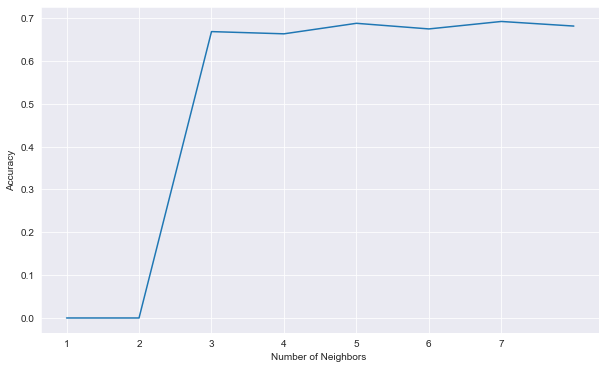

In [206]:
loc = np.arange(1,8,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,9), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [127]:
xgb = XGBRFClassifier()

In [128]:
xgb.fit(x_train1,y_train)

C:\Users\vivek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=6,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [129]:
acc_train_xgb1 =xgb.score(x_train1,y_train)

In [130]:
acc_test_xgb1 =xgb.score(x_test1,ytest)

In [131]:
ada = AdaBoostClassifier()
ada.fit(x_train1,y_train)
acc_train_ada1 =ada.score(x_train1,y_train)

In [132]:
acc_train_ada1

0.7477526158078303

In [133]:
acc_test_ada1 =ada.score(x_test1,ytest)
acc_test_ada1

0.7453305662614883

In [ ]:
print('hello')